In [1]:
import logging

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from tqdm import tqdm

from monopoly import MonopolyJunior
from monopoly.models import GameState, PlayerState

logging.basicConfig(level=logging.INFO, format="%(levelname)-8s%(message)s")

In [2]:
logging.disable(logging.WARNING)
num_players = 4
winners: list[PlayerState] = []
rounds = []
game_states: list[GameState] = []
for i in tqdm(range(10000)):
    game = MonopolyJunior(num_players, i)
    game.play()
    winners.append(getattr(game.winner, "state", None))
    rounds.append(game.turn)
    game_states.append(game.state)

100%|██████████| 10000/10000 [00:10<00:00, 916.72it/s]


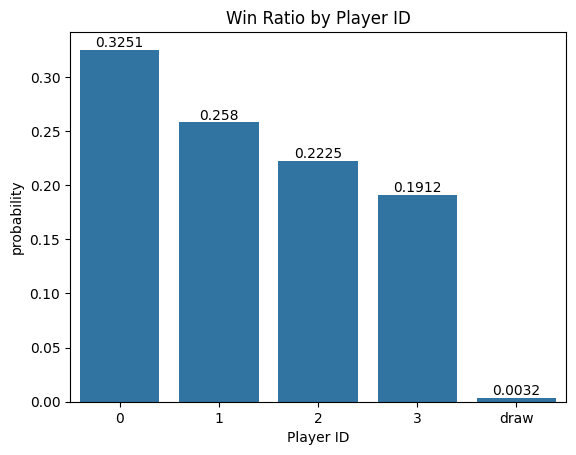

In [3]:
# Win Ratio by Player ID
data = sorted([str(w.id) if w is not None else "draw"
               for w in winners])
ax = sns.countplot(x=data, stat="probability")
ax.bar_label(ax.containers[0])
plt.xlabel("Player ID")
plt.title("Win Ratio by Player ID")
plt.show()

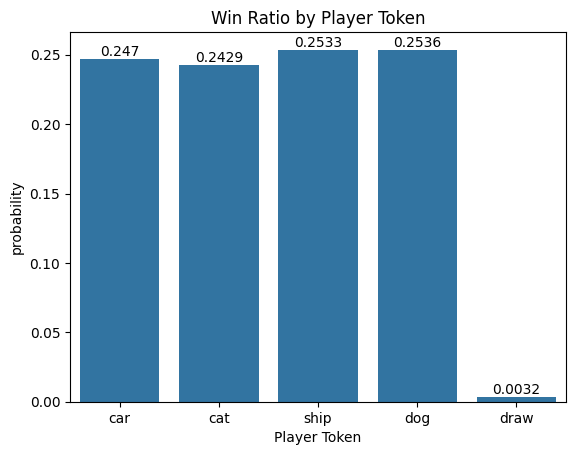

In [4]:
# Win Ratio by Player Token
data = sorted([w.token if w is not None else "draw"
               for w in winners],
              key=lambda x: 1 if x == "draw" else 0)
ax = sns.countplot(x=data, stat="probability")
ax.bar_label(ax.containers[0])
plt.xlabel("Player Token")
plt.title("Win Ratio by Player Token")
plt.show()

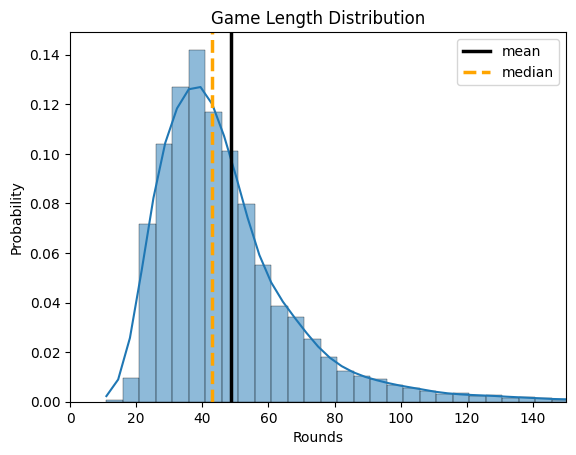

In [5]:
# Distriubution of Game length
data = list(filter(lambda x: x < 1000, rounds))
sns.histplot(data, binwidth=5, kde=True, stat="probability")
plt.axvline(np.mean(data), c='k', ls='-', lw=2.5, label="mean")
plt.axvline(np.median(data), c='orange', ls='--', lw=2.5, label="median")
plt.title("Game Length Distribution")
plt.xlabel("Rounds")
plt.xlim(0, 150)
plt.legend()
plt.show()

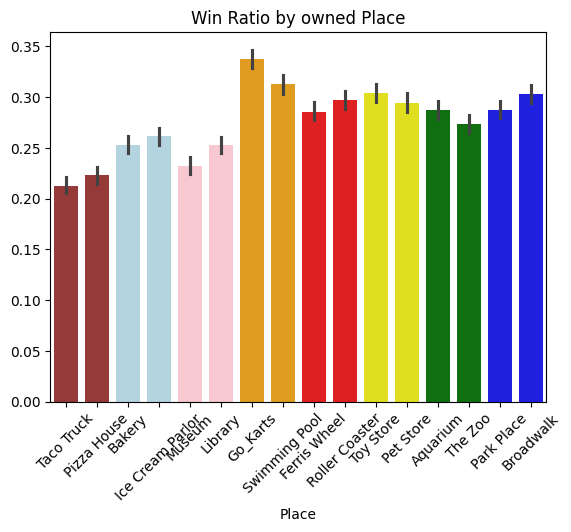

In [6]:
# Win Ratio per Place
data = pd.DataFrame(
    [[1 if place.owner == winners[game_state.game_id].id else 0
        for place in game_state.board.places] for game_state in game_states
        if winners[game_state.game_id]],
    columns=[place.name for place in game_states[0].board.places])
colors = [place.color for place in game_states[0].board.places]
sns.barplot(data=data, palette=colors)
plt.xlabel("Place")
plt.xticks(rotation=45)
plt.title("Win Ratio by owned Place")
plt.show()